In [141]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [142]:
import kagglehub

path = kagglehub.dataset_download("dileep070/heart-disease-prediction-using-logistic-regression")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease-prediction-using-logistic-regression


In [143]:
# Load Dataset 
data = pd.read_csv("/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None


In [144]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [145]:
missing_values = data.isnull().mean() * 100

In [146]:
missing_values

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [147]:
# Preprocessing 

data['heartRate'] = data['heartRate'].fillna(data['heartRate'].median())

for col in numerical_columns:
    data[col] = data[col].fillna(data[col].median())

for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

processed_data = data.isnull().sum()

processed_data

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [148]:
# Modelling 

X = data.drop(columns=['TenYearCHD'])  
y = data['TenYearCHD']                 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3390, 15), (848, 15), (3390,), (848,))

In [149]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

accuracy, precision, recall, f1, conf_matrix

(0.847877358490566,
 0.5,
 0.06976744186046512,
 0.12244897959183673,
 array([[710,   9],
        [120,   9]]))

In [150]:
classification_rep = classification_report(y_test, y_pred_logistic, target_names=['No CHD', 'CHD'])

print(classification_rep)

              precision    recall  f1-score   support

      No CHD       0.86      0.99      0.92       719
         CHD       0.50      0.07      0.12       129

    accuracy                           0.85       848
   macro avg       0.68      0.53      0.52       848
weighted avg       0.80      0.85      0.80       848



<Figure size 800x600 with 0 Axes>

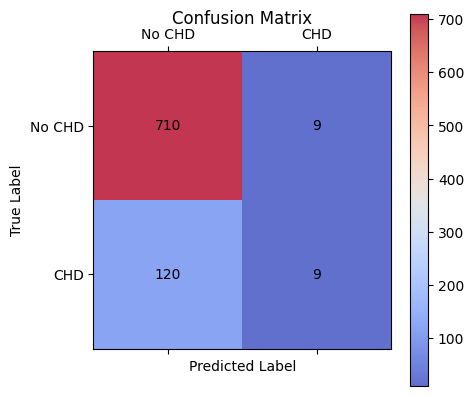

In [151]:
# Confusion Matrix 

plt.figure(figsize=(8, 6))
plt.matshow(conf_matrix, cmap='coolwarm', alpha=0.8)
plt.colorbar()

for (i, j), value in np.ndenumerate(conf_matrix):
    plt.text(j, i, str(value), ha='center', va='center', color='black')

plt.title('Confusion Matrix', pad=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0, 1], labels=['No CHD', 'CHD'])
plt.yticks(ticks=[0, 1], labels=['No CHD', 'CHD'])
plt.show()

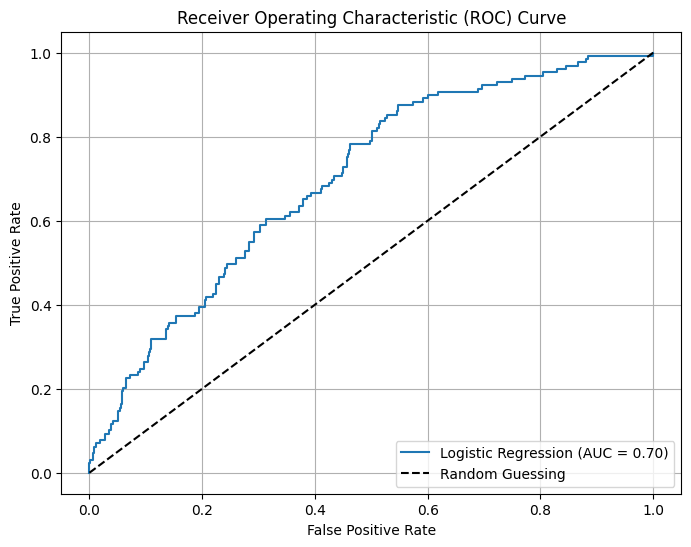

In [152]:
# ROC Curve

y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_logistic)
roc_auc = roc_auc_score(y_test, y_prob_logistic)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
